# Bước 3: Mô hình Phân khúc khách hàng

Notebook này thực hiện phân khúc khách hàng sử dụng các kỹ thuật clustering.

## Mục tiêu

1. Tải features đã xử lý từ kỹ thuật tạo features
2. Áp dụng Phân tích thành phần chính (PCA) để trực quan hóa dữ liệu
3. Xác định số cluster tối ưu
4. Áp dụng K-Means clustering
5. Phân tích và diễn giải các phân khúc khách hàng
6. Lưu kết quả phân cụm

## Phân khúc khách hàng là gì?

Phân khúc khách hàng là quá trình chia khách hàng thành các nhóm dựa trên các đặc điểm chung. Điều này giúp doanh nghiệp:
- Hiểu được các hành vi khách hàng khác nhau
- Nhắm mục tiêu các nỗ lực marketing hiệu quả hơn
- Cải thiện dịch vụ khách hàng
- Tăng khả năng giữ chân khách hàng

## Import thư viện

In [2]:
%load_ext autoreload
%autoreload 2

# Import thư viện
import sys
sys.path.append('../src')

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tải dữ liệu đã xử lý

In [3]:
# Tải features đã chuẩn hóa (chuẩn bị cho clustering)
scaled_path = '../data/processed/customer_features_scaled.csv'
original_path = '../data/processed/customer_features.csv'

# Khởi tạo cluster analyzer và tải dữ liệu
analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

df_scaled.head()

Số khách hàng: 3921
Số features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836


In [4]:
# Kiểm tra thống kê cơ bản
print("Thống kê mô tả dữ liệu đã chuẩn hóa:")
df_scaled.describe().round(2)

Thống kê mô tả dữ liệu đã chuẩn hóa:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.90,-5.07,-2.99,-5.04,-1.16,-2.30,-1.02,-2.31,-5.07,-4.20,-3.04,-6.00,-5.14,-2.99,-3.00,-3.17
25%,-0.66,-0.55,-0.48,-0.65,-1.16,-0.70,-1.02,-0.65,-0.56,-0.58,-0.42,-0.60,-0.55,-0.57,-0.50,-0.45
50%,-0.03,0.04,0.08,0.00,-0.20,-0.00,-0.23,0.02,0.05,0.03,0.02,0.07,0.06,0.07,0.10,0.02
75%,0.67,0.59,0.48,0.69,0.89,0.70,0.81,0.64,0.57,0.62,0.48,0.58,0.58,0.56,0.47,0.51
max,4.98,4.55,3.80,4.60,2.43,4.77,2.07,4.20,3.95,8.85,3.73,7.48,4.52,3.38,3.76,3.34


## Phân tích thành phần chính (PCA)

PCA giúp chúng ta:
- Giảm số chiều trong dữ liệu
- Trực quan hóa dữ liệu nhiều chiều trong 2D hoặc 3D
- Hiểu features nào quan trọng nhất
- Loại bỏ nhiễu và thông tin dư thừa

In [5]:
# Áp dụng PCA
df_pca = analyzer.apply_pca()
df_pca.head()

PCA shape: (3921, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
CustomerID,,,,,,,,,,,,,,,,
000nan,5.104705,6.063078,6.391219,0.226072,-1.197016,0.932380,0.608974,2.324502,-0.421618,-1.520668,-1.335087,-0.344153,0.849803,0.305922,-0.152621,-0.421493
012346,11.876819,2.811105,-5.279586,7.056986,0.348378,0.627562,0.026393,-4.394967,-0.403090,0.147813,-0.908287,0.545115,0.249571,-0.642368,-0.531846,0.184966
012747,3.293322,0.261896,2.094127,-1.435189,0.633041,0.106012,-0.189400,0.024610,0.066971,-0.302740,0.089189,0.029122,0.148284,-0.107151,0.113264,-0.016799
012748,1.106624,4.646175,3.207660,-2.557721,-1.609905,0.409120,1.302159,0.980759,-0.661655,-0.488400,-1.454928,-0.431079,-0.214607,0.126055,-0.127404,0.191716
012749,1.486280,1.811761,2.660052,1.085017,-0.092466,-0.212635,-0.054372,0.136352,0.058247,0.205333,0.046851,0.032185,-0.063369,-0.024972,0.000927,-0.053809


### Tỷ lệ phương sai được giải thích

Biểu thị lượng thông tin (phương sai) mà mỗi thành phần chính nắm bắt được.

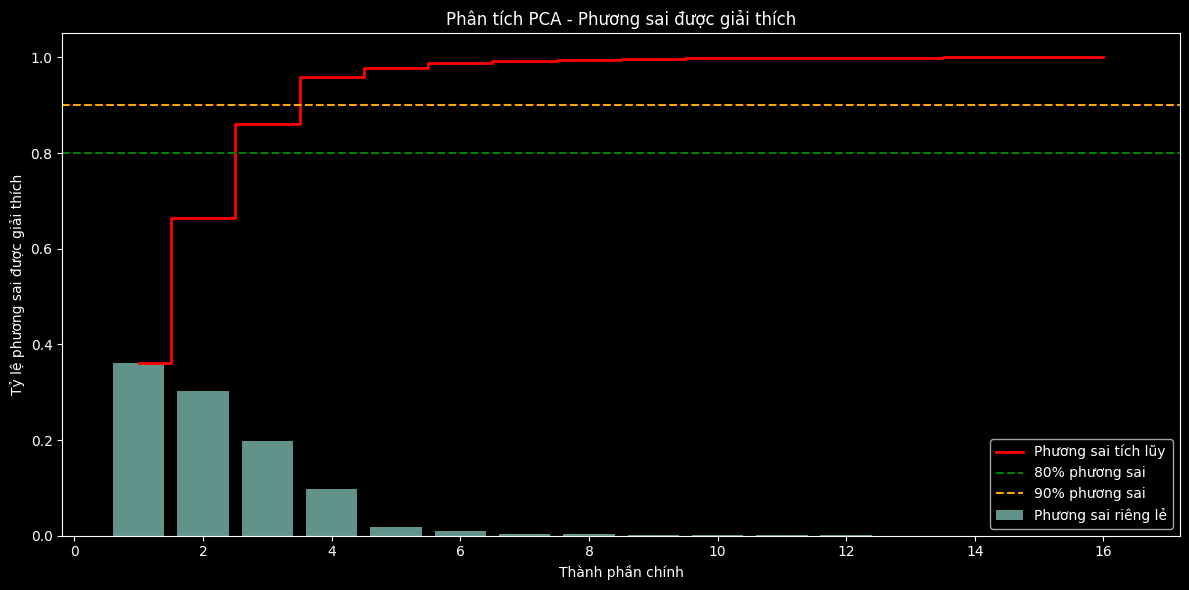


Phương sai tích lũy:
PC1-PC1: 36.08%
PC1-PC2: 66.41%
PC1-PC3: 86.12%
PC1-PC4: 95.95%
PC1-PC5: 97.76%


In [6]:
# Biểu đồ tỷ lệ phương sai được giải thích
analyzer.plot_pca_variance()

## Xác định số Cluster tối ưu

Tìm số cluster phù hợp (k) là điều quan trọng cho việc phân khúc có ý nghĩa. Chúng ta sẽ sử dụng hai phương pháp bổ sung:

1. **Phương pháp Elbow**: Tìm "khuỷu tay" trong đường cong inertia
2. **Silhouette Score**: Tìm k có điểm silhouette trung bình cao nhất

Sử dụng cả hai phương pháp cùng nhau giúp chúng ta tin tưởng hơn vào việc chọn k.

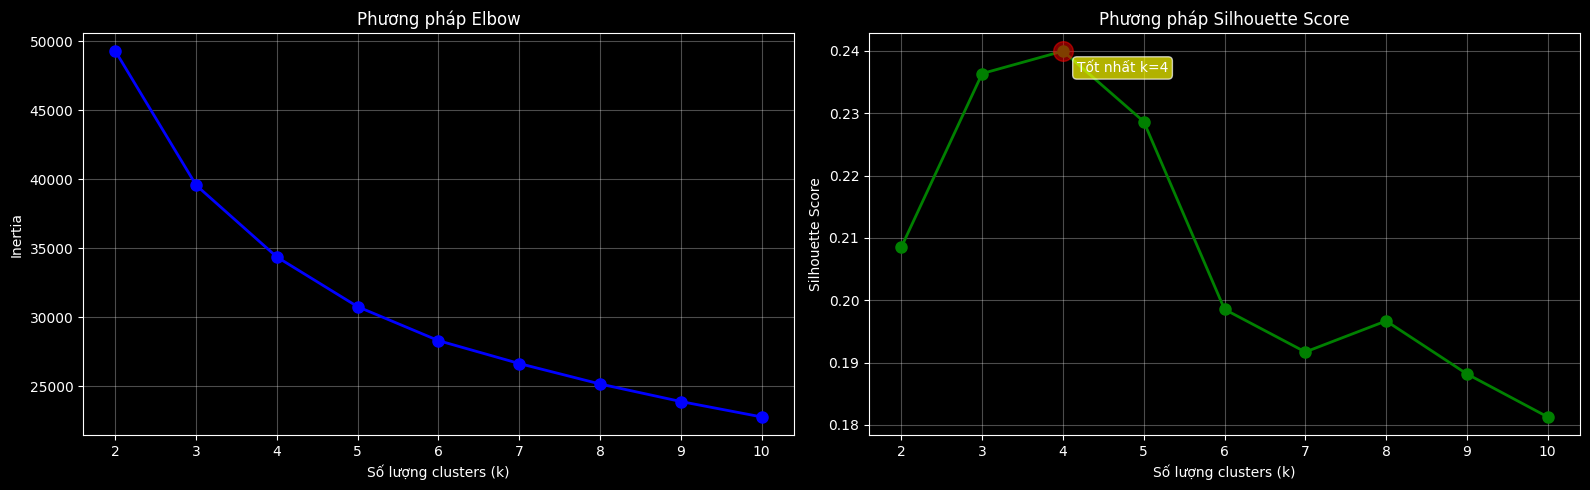

Silhouette Score đề xuất: k=4 (điểm số = 0.240)


In [7]:
# Tìm số cluster tối ưu
optimal_results = analyzer.find_optimal_clusters()

# Vẽ biểu đồ so sánh các phương pháp
analyzer.plot_optimal_clusters()

## K-Means Clustering

Chúng ta sẽ áp dụng K-Means clustering với các giá trị k khác nhau (3 và 4) và so sánh kết quả.

Kích thước clusters (k=3):
0    1540
1    1512
2     869
Name: count, dtype: int64
Kích thước clusters (k=4):
0    1114
1     646
2    1319
3     842
Name: count, dtype: int64


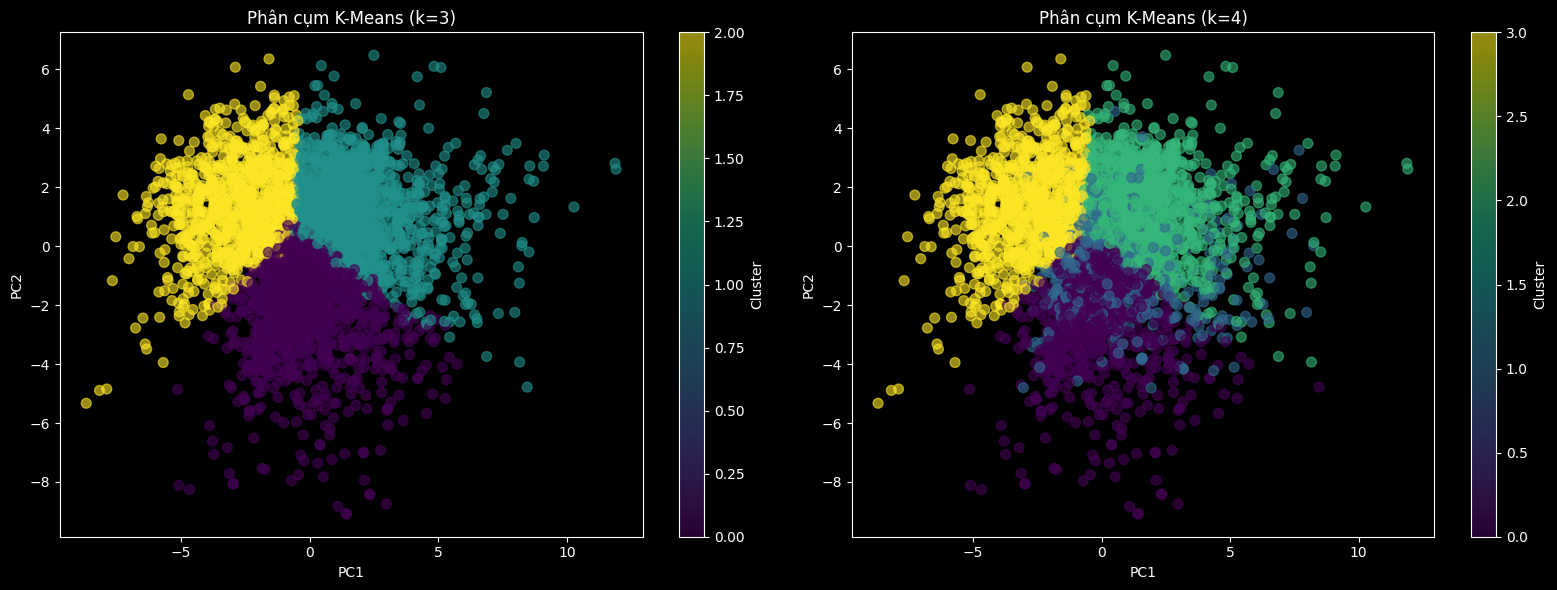

In [8]:
# Áp dụng K-Means với k=3 và k=4
cluster_results = analyzer.apply_kmeans([3, 4])

# Trực quan hóa clusters trong không gian PCA
analyzer.plot_clusters_pca([3, 4])

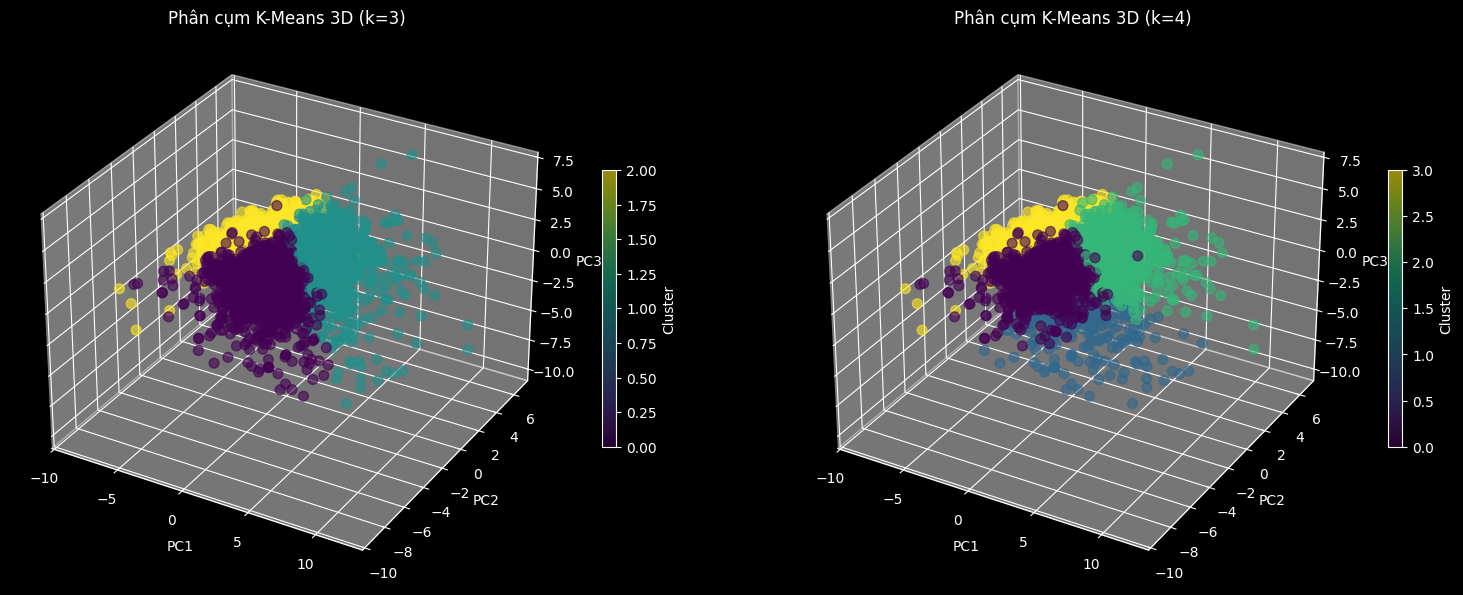

In [9]:
# Trực quan hóa clusters trong không gian PCA 3D
analyzer.plot_clusters_pca_3d([3, 4])

## Phân tích và diễn giải Cluster

Hãy phân tích đặc điểm của từng cluster để hiểu các phân khúc khách hàng khác nhau.

In [10]:
# Thống kê trung bình cho từng cluster
print("=== PHÂN TÍCH CLUSTER K=3 ===")
cluster_means_3 = cluster_results[3]['means']
cluster_sizes_3 = cluster_results[3]['sizes']

print("Kích thước clusters:")
for cluster, size in cluster_sizes_3.items():
    print(f"- Cluster {cluster}: {size:,} khách hàng ({size/cluster_sizes_3.sum()*100:.1f}%)")

display(cluster_means_3.round(2).style.background_gradient(cmap='viridis', axis=0))

=== PHÂN TÍCH CLUSTER K=3 ===
Kích thước clusters:
- Cluster 0: 1,540 khách hàng (39.3%)
- Cluster 1: 1,512 khách hàng (38.6%)
- Cluster 2: 869 khách hàng (22.2%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
Cluster_3,,,,,,,,,,,,,,,,
0,181.160000,6.350000,33.980000,365.260000,1.680000,16.170000,1.080000,11.300000,6.860000,124.190000,35.750000,240.680000,6.340000,16.910000,33.440000,39.270000
1,2627.300000,3.590000,147.830000,5154.670000,8.310000,88.530000,1.520000,21.310000,4.280000,412.290000,173.230000,633.410000,3.810000,133.770000,145.770000,200.940000
2,472.870000,2.620000,6.290000,769.690000,3.300000,95.160000,1.220000,41.990000,2.770000,159.610000,7.110000,246.560000,2.630000,4.820000,6.250000,7.600000


In [11]:
# Thống kê trung bình cho từng cluster k=4
print("=== PHÂN TÍCH CLUSTER K=4 ===")
cluster_means_4 = cluster_results[4]['means']
cluster_sizes_4 = cluster_results[4]['sizes']

print("Kích thước clusters:")
for cluster, size in cluster_sizes_4.items():
    print(f"- Cluster {cluster}: {size:,} khách hàng ({size/cluster_sizes_4.sum()*100:.1f}%)")

display(cluster_means_4.round(2).style.background_gradient(cmap='viridis', axis=0))

=== PHÂN TÍCH CLUSTER K=4 ===
Kích thước clusters:
- Cluster 0: 1,114 khách hàng (28.4%)
- Cluster 1: 646 khách hàng (16.5%)
- Cluster 2: 1,319 khách hàng (33.6%)
- Cluster 3: 842 khách hàng (21.5%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,
0,165.100000,8.500000,46.000000,434.860000,1.770000,17.190000,1.090000,11.420000,9.190000,103.480000,48.160000,260.670000,8.490000,12.230000,45.310000,76.110000,0.000000
1,504.820000,1.670000,56.510000,481.830000,1.720000,18.050000,1.110000,12.720000,1.680000,303.770000,59.040000,312.390000,1.670000,85.710000,56.080000,68.500000,0.370000
2,2851.500000,3.570000,142.810000,5753.740000,9.230000,98.620000,1.560000,22.330000,4.380000,388.020000,170.950000,639.850000,3.810000,121.070000,140.600000,178.600000,1.000000
3,464.650000,2.650000,6.170000,760.490000,3.280000,95.670000,1.220000,42.400000,2.760000,154.420000,6.970000,245.220000,2.660000,4.540000,6.140000,7.470000,2.000000


### Biểu đồ Radar cho hồ sơ Cluster

Biểu đồ Radar giúp chúng ta visualize đặc điểm của từng cluster một cách trực quan.

#### Cách đọc Radar Chart:

1. **Mỗi trục = 1 đặc điểm khách hàng** (đã được chuẩn hóa về scale 0-1)
2. **Càng xa tâm = giá trị càng cao** cho đặc điểm đó
3. **Hình dạng của đa giác** cho thấy "hồ sơ" của cluster
4. **So sánh các cluster** bằng cách nhìn vào hình dạng và kích thước

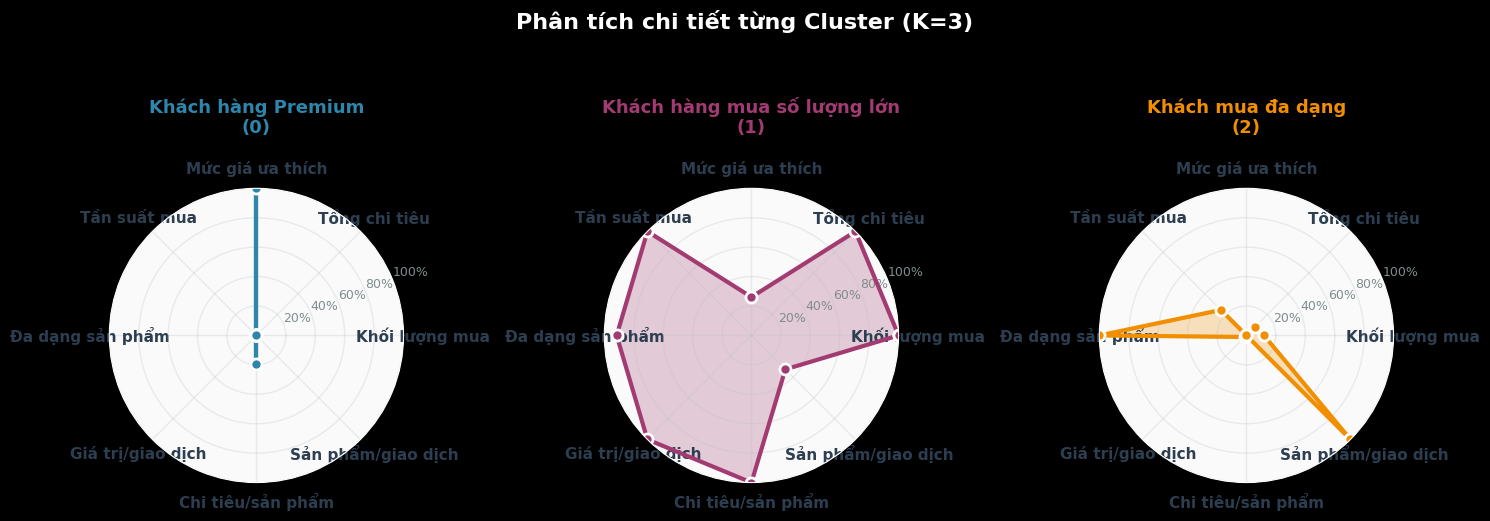

In [12]:
# Tạo individual radar plots cho k=3
analyzer.create_individual_radar_plots(3, ['Khách hàng Premium', 'Khách hàng mua số lượng lớn', 'Khách mua đa dạng'])

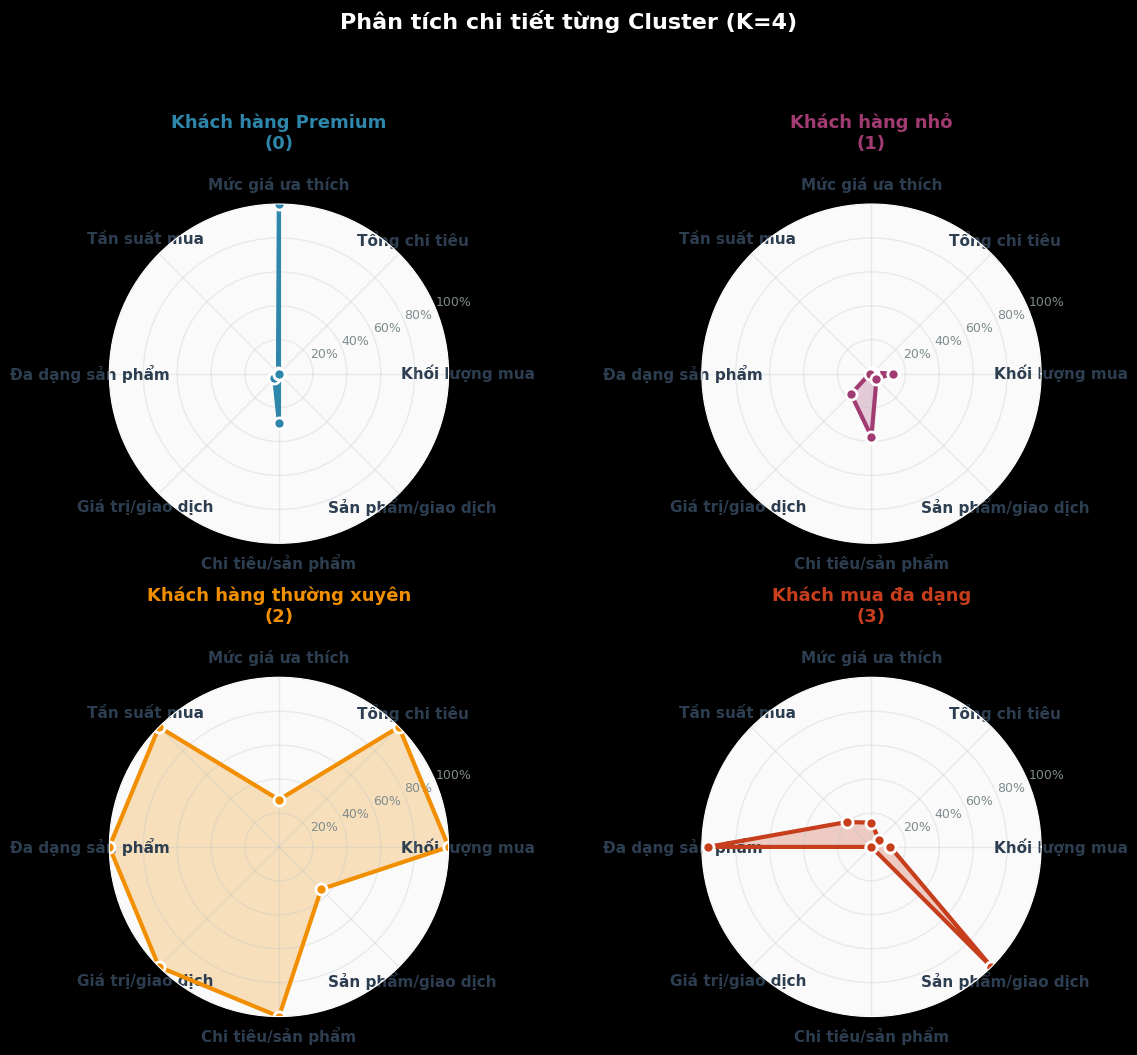

In [13]:
# Tạo individual radar plots cho k=4
analyzer.create_individual_radar_plots(4, ['Khách hàng Premium', 'Khách hàng nhỏ', 'Khách hàng thường xuyên', 'Khách mua đa dạng'])

### Phân tích Radar Chart

**So sánh k=3 vs k=4:**

**Với K=3 clusters (phân tích chi tiết theo số liệu):**
- **Cluster 0 (39.3% - 1,540 khách)**: **Khách hàng Premium**
  - Giá trung bình cao nhất: 6.35 vs 3.59 và 2.62
  - Số lượng mua vừa phải: 181 sản phẩm
  - Ít giao dịch nhưng giá trị cao: 1.68 hóa đơn, giá trị 365
  
- **Cluster 1 (38.6% - 1,512 khách)**: **Khách hàng Mua Số Lượng Lớn** 
  - **Đặc điểm nổi bật**: Số lượng mua cao nhất 2,627 (gấp 14.5 lần cluster 0)
  - Giá thấp nhất trong 3 cluster: 3.59 (chiết khấu số lượng)
  - Nhiều giao dịch nhất: 8.31 hóa đơn (gấp 5 lần cluster 0)
  - Tổng giá trị cao nhất: 5,155 (gấp 14 lần cluster 0)
  
- **Cluster 2 (22.2% - 869 khách)**: **Khách hàng Khám Phá Đa Dạng**
  - Mua nhiều sản phẩm khác nhau nhất: 95.16 loại sản phẩm
  - Giá rất thấp: 2.62 (sản phẩm bình dân)
  - Ít giao dịch: 3.3 hóa đơn

**Với K=4 clusters (sự phân tách từ K=3):**
- **Cluster 0 (28.4%)**: Khách hàng Premium - **Giữ nguyên** từ K=3
- **Cluster 1 (16.5%)**: **Khách hàng Mua Ít** - Tách từ "Mua Số Lượng Lớn" K=3
- **Cluster 2 (33.6%)**: **Khách hàng Mua Nhiều Thường Xuyên** - Phần còn lại của "Mua Số Lượng Lớn" K=3  
- **Cluster 3 (21.5%)**: Khách hàng Đa dạng - **Giữ nguyên** từ K=3

#### Insights từ Radar Chart:

**1. Cluster "Mua Số Lượng Lớn" (Cluster 1 trong K=3) được phân tách thành 2:**
- **Lý do phân tách**: Trong K=3, cluster này quá lớn (38.6%) và có internal variance cao
- **Cluster 1 K=4 (16.5%)**: Nhóm khách hàng mua ít hơn, có thể là khách lẻ hoặc SME
- **Cluster 2 K=4 (33.6%)**: Nhóm khách hàng mua nhiều thường xuyên, có thể là B2B/wholesaler

**2. Pattern Recognition từ Radar Chart:**
- **Premium (Cluster 0)**: "Spike" cao ở UnitPrice, thấp ở Quantity → **High-margin customers**
- **Bulk Buyers (Cluster 1 K=3)**: "Spike" cao ở Quantity + Invoice count → **Volume-driven customers**  
- **Explorers (Cluster 2 K=3)**: Cân bằng ở Stock diversity → **Discovery-oriented customers**

**3. Giá trị kinh doanh của K=4 vs K=3:**

**K=3 Problems:**
- Cluster "Mua Số Lượng Lớn" quá broad (38.6%), khó targeting
- Mix giữa khách SME và khách B2B trong cùng 1 cluster

**K=4 Solutions:**
- **Segmentation tốt hơn**: 4 nhóm với behavior patterns rõ ràng
- **Balanced distribution**: 16-34% mỗi cluster thay vì 22-39%
- **Actionable insights**: Mỗi cluster có chiến lược riêng

**4. Strategic Recommendations dựa trên K=4:**
- **Cluster 0 (Premium 28.4%)**: VIP program, premium product focus
- **Cluster 1 (Mua Ít 16.5%)**: Upselling campaigns, product bundles  
- **Cluster 2 (Mua Nhiều 33.6%)**: Volume discounts, B2B services
- **Cluster 3 (Đa Dạng 21.5%)**: Recommendation engine, cross-selling

**5. Conclusion: K=4 Tốt hơn cho Business Application**
- **Granularity**: Phân khúc chi tiết hơn mà không over-segment
- **Actionability**: Mỗi cluster có action plan rõ ràng
- **Revenue potential**: Tối ưu hóa strategy cho từng customer journey

## Lưu kết quả phân cụm

In [14]:
# Lưu kết quả phân cụm cho cả k=3 và k=4
analyzer.save_clusters()

Đã lưu kết quả phân cụm k=3: ../data/processed/customer_clusters_k3.csv
Đã lưu kết quả phân cụm k=4: ../data/processed/customer_clusters_k4.csv


## Giải thích Cluster với SHAP Values

**SHAP (SHapley Additive exPlanations)** là một phương pháp tiên tiến để giải thích kết quả của mô hình machine learning.

### Tại sao cần SHAP cho Clustering?

Mặc dù **Radar Chart** giúp chúng ta hiểu **đặc điểm trung bình** của mỗi cluster, nhưng nó không trả lời được câu hỏi quan trọng:

> **"Tại sao khách hàng A thuộc Cluster 2 thay vì Cluster 1?"**

SHAP giải quyết vấn đề này bằng cách:

1. **Quantify Feature Importance**: Đo lường chính xác mức độ ảnh hưởng của từng feature
2. **Individual Explanations**: Giải thích tại sao một khách hàng cụ thể thuộc cluster đó
3. **Compare with Alternatives**: So sánh khách hàng với các cluster khác

### Phương pháp: Mô hình thế

Vì K-Means là **unsupervised learning**, chúng ta sử dụng cần sử dụng một mô hình khác để có thể học trên các cluster mà K-Means chọn lựa ra để có thể đưa ra lời giải thích:

1. **Train RandomForestClassifier** để dự đoán cluster assignments từ K-Means
2. **Apply SHAP TreeExplainer** để giải thích predictions của Random Forest
3. **Interpret**: SHAP values cho biết feature nào khiến model (và gián tiếp K-Means) gán khách hàng vào cluster cụ thể

### So sánh SHAP vs Radar Chart

| Aspect | Radar Chart | SHAP Values |
|--------|-------------|-------------|
| **Mục đích** | Visualize cluster profiles | Explain individual predictions |
| **Level** | Cluster-level (trung bình) | Customer-level + Cluster-level |
| **Câu hỏi trả lời** | "Cluster này có đặc điểm gì?" | "Tại sao khách hàng X ở cluster Y?" |
| **Feature selection** | 6-8 features chọn thủ công | Tất cả 16 features, xếp hạng theo độ quan trọng |

**Kết luận**: Radar Chart và SHAP bổ sung cho nhau, không phải thay thế!

### Bước 1: Train Surrogate Models

Chúng ta sẽ train RandomForestClassifier cho cả k=3 và k=4 để dự đoán cluster assignments.

In [15]:
# Train surrogate model cho k=3
surrogate_results_3 = analyzer.train_surrogate_model(3)

=== SURROGATE MODEL TRAINING (k=3) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[1540    0    0]
 [   0 1512    0]
 [   0    0  869]]

Model can ACCURATELY predict cluster assignments.


In [16]:
# Train surrogate model cho k=4
surrogate_results_4 = analyzer.train_surrogate_model(4)

=== SURROGATE MODEL TRAINING (k=4) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[1114    0    0    0]
 [   0  646    0    0]
 [   0    0 1319    0]
 [   0    0    0  842]]

Model can ACCURATELY predict cluster assignments.


### Bước 2: Tính toán SHAP Values

Sử dụng toàn bộ 3,921 khách hàng làm background dataset để tính SHAP values. Việc này giúp chúng ta có cái nhìn chính xác thuộc tính nào sẽ có giá trị Shapley cao nhất.

In [17]:
# Tính SHAP values cho k=3
shap_results_3 = analyzer.calculate_shap_values(3)

Tính toán SHAP values cho 3,921 khách hàng...
Hoàn thành! SHAP values: 3 clusters, mỗi cluster shape: (3921, 16)


In [18]:
# Tính SHAP values cho k=4
shap_results_4 = analyzer.calculate_shap_values(4)

Tính toán SHAP values cho 3,921 khách hàng...
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3921, 16)


### Bước 3: SHAP Feature Importance (Global View)

Biểu đồ Beeswarm Chart cho thấy features nào quan trọng nhất và cách giá trị của chúng ảnh hưởng đến việc phân loại.

**Cách đọc:**
- **Trục Y**: Các features được sắp xếp theo độ quan trọng trung bình (từ trên xuống dưới).
- **Trục X**: Giá trị SHAP (SHAP value).
  - Giá trị **dương** (bên phải): Tác động tích cực, đẩy khách hàng vào cluster này.
  - Giá trị **âm** (bên trái): Tác động tiêu cực, đẩy khách hàng ra khỏi cluster này. Ở đây các biến đều không có giá trị dương, thế nên các biến nằm bên trái sẽ là các biến có giá trị thấp hơn trung bình trong toàn bộ tập dữ liệu.
- **Màu sắc**: Giá trị thực tế của feature.
  - **Đỏ**: Giá trị cao.
  - **Xanh**: Giá trị thấp.
- **Mỗi điểm**: Đại diện cho một khách hàng.

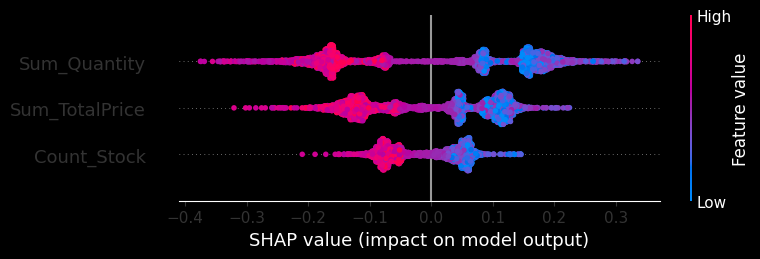

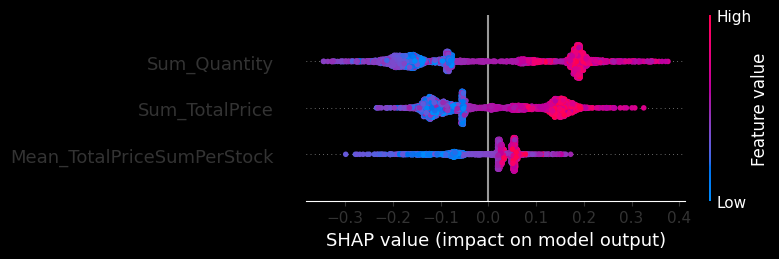

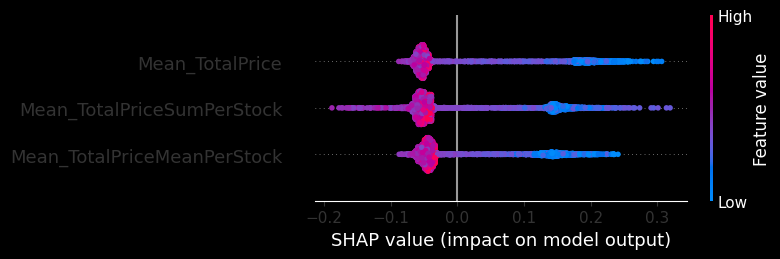

In [29]:
analyzer.plot_shap_summary(3)

### So sánh kết quả SHAP và Radar Chart (K=3)

Dựa trên biểu đồ Radar và biểu đồ SHAP Summary cho 3 cụm khách hàng, chúng ta có thể rút ra các so sánh chi tiết dưới đây.

**Cluster 0 (Khách hàng Premium)**
*   **Radar Chart:** Thể hiện rõ sự vượt trội ở trục "Mức giá ưa thích" (Mean_UnitPrice) trong khi các trục về khối lượng và tần suất thấp.
*   **SHAP:** Các biến "Khối lượng mua" (Sum_Quantity), "Tổng chi tiêu" (Sum_TotalPrice) và "Đa dạng sản phẩm" (Count_Stock) đóng vai trò quan trọng, khác biệt so với trục Mean_UnitPrice được chọn ở Radar Chart.

**Cluster 1 (Khách hàng mua số lượng lớn)**
*   **Radar Chart:** Bao phủ diện tích lớn nhất về phía các trục "Tổng chi tiêu" (Sum_TotalPrice), "Khối lượng mua" (Sum_Quantity) và "Tần suất mua" (Count_Invoice).
*   **SHAP:** Các biến Sum_Quantity, Sum_TotalPrice đóng vai trò quan trọng nhất. Giá trị cao của các biến này đẩy mô hình phân loại khách hàng vào nhóm 1. Ta thấy được biến hai biến này mang tính hiệu ngược với nhóm khách hàng premium. Nếu như hai biến nói trên cao, thì thuật toán KMeans sẽ phân loại vào nhóm khách mua số lượng lớn và ngược lại.

**Cluster 2 (Khách mua đa dạng)**
*   **Radar Chart:** Mở rộng về phía trục "Đa dạng sản phẩm" (Count_Stock) và "Sản phẩm trên giao dịch" (Mean_StockCountPerInvoice)
*   **SHAP:** Biến Mean_TotalPrice và Mean_TotalPriceSumPerStock là hai biến mà thuật toán SHAP thấy quan trọng nhưng không được thêm vào trong Radar Chart. Ta thấy biến cả ba biến được SHAP liệt kê ra đều nằm bên trái của plot.

Việc kết hợp Radar Chart và SHAP Beeswarm Chart mang lại cái nhìn đa chiều:
*   **Radar Chart** giúp hình dung nhanh "hình dáng" đặc trưng của từng nhóm dựa trên các chỉ số KPI chính.
*   **SHAP** đi sâu vào giải thích "tại sao" và phát hiện các biến ẩn quan trọng mà Radar Chart có thể bỏ sót (như Mean_TotalPriceMeanPerStock).
Sự kết hợp này giúp doanh nghiệp không chỉ nhận diện được khách hàng mà còn hiểu sâu động lực hành vi của họ để có chiến lược tác động phù hợp.

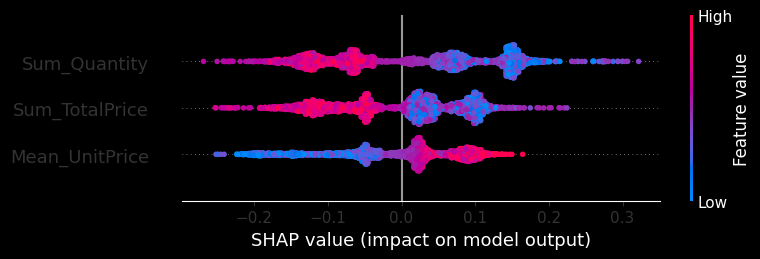

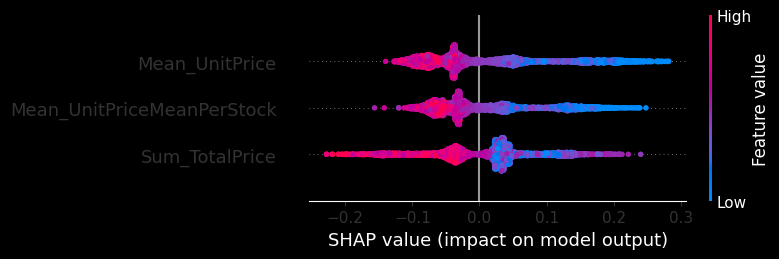

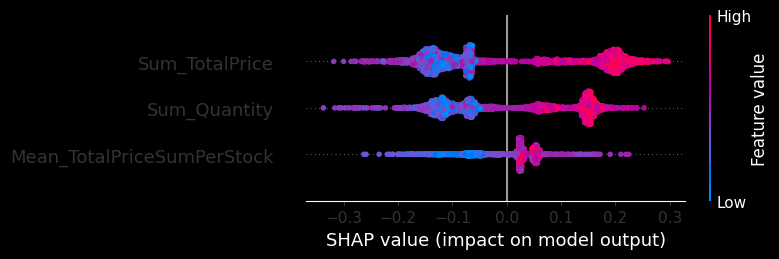

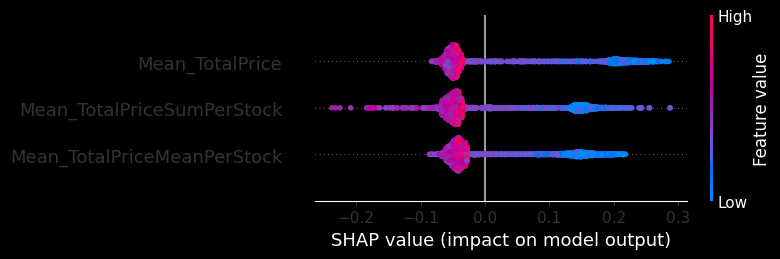

In [30]:
analyzer.plot_shap_summary(4)

### Phân tích chi tiết SHAP cho K=4

Khi mở rộng phân cụm lên K=4, biểu đồ SHAP Beeswarm cung cấp cái nhìn sâu sắc hơn về cách các nhóm khách hàng được tách biệt, đặc biệt là sự phân hóa của nhóm mua số lượng lớn.

**Cluster 0 (Khách hàng Premium)**
*   **SHAP:** Biến Mean_UnitPrice vẫn là yếu tố định danh mạnh mẽ nhất. Các điểm dữ liệu màu đỏ (giá trị cao) của biến này tập trung dày đặc ở phía dương của trục hoành đối với Cluster 0, khẳng định đây là đặc điểm độc nhất của nhóm này.

**Cluster 1 (Khách hàng Mua Ít)**
*   **SHAP:** Nhóm này được đặc trưng bởi giá trị thấp của các biến Sum_Quantity, Sum_TotalPrice và Count_Invoice. Trên biểu đồ Beeswarm, các điểm dữ liệu của nhóm này sẽ tập trung về phía bên trái (giá trị SHAP âm) của các biến về khối lượng và tần suất, cho thấy sự đóng góp thấp vào doanh thu tổng.

**Cluster 2 (Khách hàng Mua Nhiều Thường Xuyên)**
*   **SHAP:** Đây là nhóm đối lập với Cluster 1. Các biến Sum_Quantity và Sum_TotalPrice có tác động tích cực mạnh mẽ (giá trị SHAP dương lớn). Màu đỏ của các điểm dữ liệu tại các biến này cho thấy giá trị thực tế rất cao, xác nhận đây là nhóm khách hàng VIP về mặt doanh số.

**Cluster 3 (Khách hàng Đa Dạng)**
*   **SHAP:** Biến Count_Stock và Mean_StockCountPerInvoice đóng vai trò chủ đạo. SHAP value cao ở các biến này cho thấy sự đa dạng trong danh mục mua sắm là yếu tố quyết định để mô hình tách nhóm này ra khỏi nhóm mua nhiều (Cluster 2) và nhóm Premium (Cluster 0).

**Kết luận**
Ở K=4, SHAP cho thấy ranh giới quyết định (decision boundary) rõ ràng hơn giữa các nhóm. Đặc biệt, nó minh chứng rằng việc tách nhóm "Mua số lượng lớn" cũ thành "Mua Ít" và "Mua Nhiều" là hoàn toàn có cơ sở dữ liệu, dựa trên sự chênh lệch lớn về SHAP value của các biến Sum_Quantity và Sum_TotalPrice.

### Key Insights từ SHAP Analysis

**Feature Importance**
SHAP values cho thấy ranking chính xác của 16 features theo mức độ quan trọng, giúp:
- **Thu thập dữ liệu tốt hơn**: Focus vào features có impact cao
- **Feature engineering**: Biết features nào cần refine
- **Kết hoạch kinh doanh tốt hơn**: Align KPIs với important features

**Cho chúng ta thêm một góc nhìn khác**: 
- Radar Chart = **What** (cluster có đặc điểm gì)
- SHAP = **Why** (tại sao khách hàng thuộc cluster đó)

**Actionable**: Combine cả hai loại chard để hiểu rõ hơn nhóm khách hàng của chúng ta.

**Model Trustworthiness**
Mô hình thế có độ chính xác ≥95% chứng tỏ:
- RandomForest có thể học đúng hoàn toàn K-Means decisions
- Lời giải thích của SHAP đáng tin cậy
- Clusters dù được chia làm 3 hay 4 đều có một ranh giới rõ ràng, thể hiện chúng ta đang phân cụm đúng cách.

## Tóm tắt

Trong notebook này, chúng ta đã:

1. **Tải features đã xử lý** - đã chuẩn hóa và sẵn sàng cho clustering
2. **Áp dụng PCA** để hiểu cấu trúc dữ liệu và giảm chiều
   - 2-3 thành phần đầu giải thích phần lớn phương sai
   - Trực quan hóa phân phối khách hàng trong không gian thấp chiều
3. **Xác định số cluster tối ưu** bằng Silhouette Score
   - Kiểm tra k=2 đến k=10
   - Xác định các giá trị hiệu suất tốt nhất
4. **Áp dụng K-Means clustering** với k=3 và k=4
   - Tạo các phân khúc khách hàng
   - Trực quan hóa clusters trong không gian PCA
5. **Phân tích đặc điểm cluster**
   - Xác định các phân khúc khách hàng riêng biệt
   - Sử dụng biểu đồ radar để diễn giải
6. **Giải thích clusters với SHAP values**
   - Train RandomForest với accuracy ≥95%
   - Tính SHAP values cho toàn bộ 3,921 khách hàng
   - Visualize feature importance
   - Validate với Radar Chart 
7. **Lưu kết quả phân cụm** để sử dụng kinh doanh

### Phát hiện chính:

- Khách hàng có thể được phân khúc có ý nghĩa thành 3-4 nhóm
- Mỗi phân khúc có hành vi mua hàng riêng biệt
- Các phân khúc từ khách hàng giá trị cao đến người khám phá sản phẩm đến người mua sắm cao cấp
- SHAP analysis thể hiện features nào quan trọng nhất cho mỗi cluster

### Đề xuất kinh doanh:

1. **Khách hàng giá trị cao (Cluster 0)**: 
   - Tập trung vào việc giữ chân với các chương trình VIP
   - Monitor high-SHAP features để predict churn
   
2. **Người khám phá sản phẩm (Cluster 3)**: 
   - Khuyến khích mua hàng thông qua đề xuất
   - Cross-selling based on Count_Stock patterns
   
3. **Người mua sắm Premium**: 
   - Làm nổi bật chất lượng và sản phẩm độc quyền
   - Maintain Mean_UnitPrice positioning
   
4. **Người mua số lượng lớn (Cluster 2)**: 
   - Cung cấp dịch vụ đăng ký và chiết khấu số lượng lớn
   - B2B services optimization

<br/><div class="cpr" style="text-align:center">
Copyright © Nguyen Thai Ha. All Rights Reserved.
</div>　